# Lab | Cleaning numerical data
## Cristian Valeria

<br>

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.


#### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 2. Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

#### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### 4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [5]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
cols = []
    
for col in customer_df.columns:
    cols.append(col.lower().replace(' ', '_'))
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [7]:
customer_df.columns = cols

In [8]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### 5. Change effective to date column to datetime format.

In [9]:
customer_df.effective_to_date

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

In [10]:
pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [11]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [12]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

#### 6. Check NaN values per column.

In [13]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
# there are not missing values

#### 7. Define a functions that given an input dataframe, returns two dataframes: one with the numerical columns and another with categorical columns of the input dataframe.

In [15]:
customer_df.select_dtypes(np.number).head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [16]:
customer_df.select_dtypes(object).head()

customer       state response  coverage education employmentstatus gender  \
0  BU79786  Washington       No     Basic  Bachelor         Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor       Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor         Employed      F   
3  WW63253  California       No     Basic  Bachelor       Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

In [17]:
def num_cat(x):
    numerical = x.select_dtypes(np.number)
    categorical = x.select_dtypes(object)
    return numerical, categorical

In [18]:
numerical, categorical =  num_cat(customer_df)

In [19]:
numerical.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [20]:
categorical.head()

customer       state response  coverage education employmentstatus gender  \
0  BU79786  Washington       No     Basic  Bachelor         Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor       Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor         Employed      F   
3  WW63253  California       No     Basic  Bachelor       Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

#### 8. Drop any ID column

In [21]:
# not really sure what is asked here, should i drop customer? 

In [22]:
categorical = categorical.drop('customer', axis=1)

In [23]:
categorical.head()

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

#### 9. Get the correlation matrix for the numerical variables. What is pair of numerical variables that have the highest correlation? It makes sense, why?

In [24]:
numerical.corr()

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   
number_of_open_complaints                 -0.013122                 0.005354   
number_of_policies                        -0.011233                 0.009136   
total_claim_amount                         0.632017                 0.007563   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.001158   
number_of_policies                                 -0.013333   
total_claim_amount                                  0.003335   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   
number_of_open_complaints                       1.000000            0.001498   
number_of_policies                              0.001498            1.000000   
total_claim_amount                             -0.014241           -0.002354   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335  
number_of_open_complaints               -0.014241  
number_of_policies                      -0.002354  
total_claim_amount                       1.000000

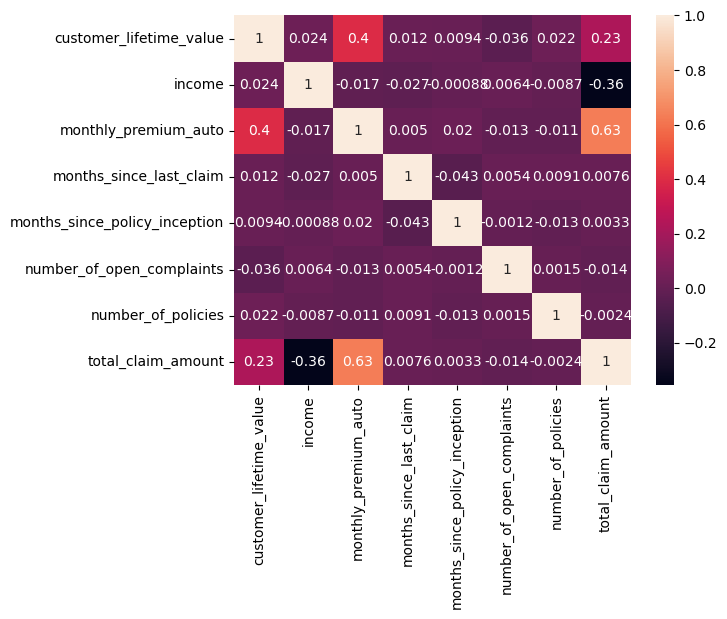

In [25]:
corr_matrix = numerical.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

highest correlation between monthly_premium_auto and total_claim_amount. Im not sure what each variable exactly mean but can make sense because people that pay premium are probably more likely to make claims 

#### 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

<br>

In [26]:
# numerical discrete columns 

In [27]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [28]:
numerical.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [29]:
numerical.nunique()>36

customer_lifetime_value           True
income                            True
monthly_premium_auto              True
months_since_last_claim          False
months_since_policy_inception     True
number_of_open_complaints        False
number_of_policies               False
total_claim_amount                True
dtype: bool

In [30]:
numerical.columns[numerical.nunique()>36]

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

In [31]:
numerical.columns[numerical.nunique()<= 36]

Index(['months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies'],
      dtype='object')

In [32]:
def n_cont_disc(df):
    continuous_df = df[df.columns[df.nunique()>36]]
    discrete_df = df[df.columns[df.nunique() <= 36]]
    return continuous_df, discrete_df

In [33]:
continuous_df, discrete_df =  n_cont_disc(numerical)

In [34]:
continuous_df.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_policy_inception  total_claim_amount  
0                              5          384.811147  
1                             42         1131.464935  
2                             38          566.472247  
3                             65          529.881344  
4                             44          138.130879

In [35]:
discrete_df.head()

months_since_last_claim  number_of_open_complaints  number_of_policies
0                       32                          0                   1
1                       13                          0                   8
2                       18                          0                   2
3                       18                          0                   7
4                       12                          0                   1

#### 11.Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [36]:
discrete_df.columns

Index(['months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies'],
      dtype='object')

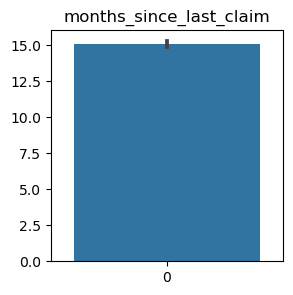

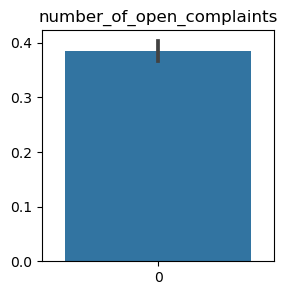

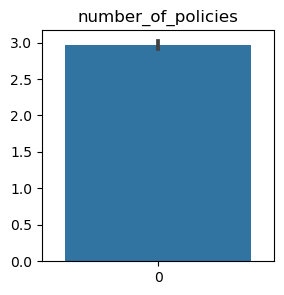

In [37]:
#figsize=(16,16)

discrete_col = discrete_df.columns

for col in discrete_col:
    plt.figure(figsize=(3,3)) #figsize=(16,16)) was to big
    plt.title(col)
    sns.barplot(data=discrete_df[col])

#### 12.Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

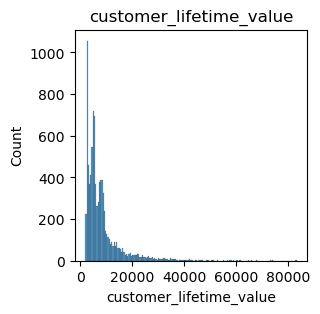

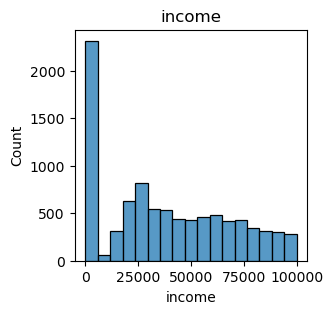

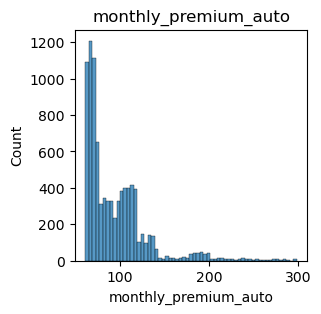

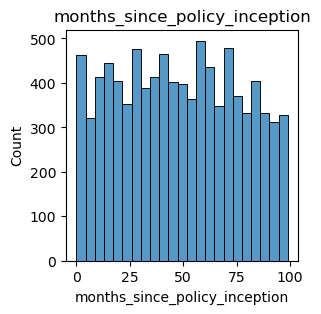

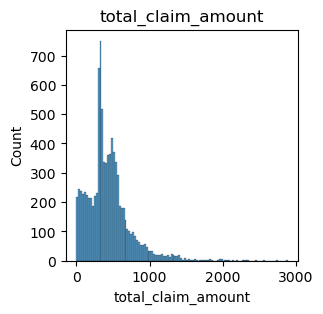

In [38]:
continuous_col = continuous_df.columns

for col in continuous_col:
    plt.figure(figsize=(3,3)) #figsize=(16,16)) was to big
    plt.title(col)
    sns.histplot(data=continuous_df[col])

#### 13. According to the previous histogram plots, do you think that you do will have to apply any transformation? (are skewed?)


Yes, everytone highly skewed except months_since_policty_inception

#### 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plots for the continuous_df.

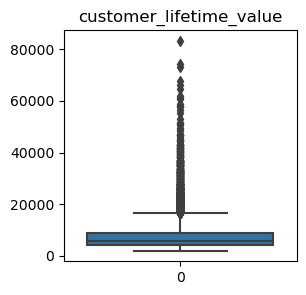

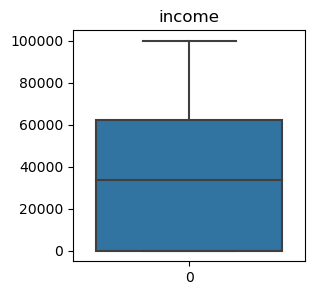

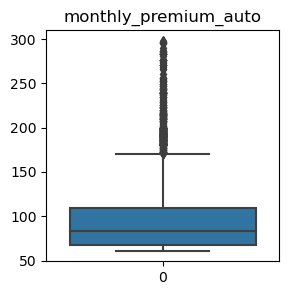

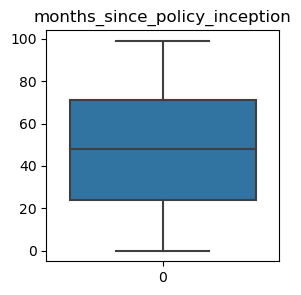

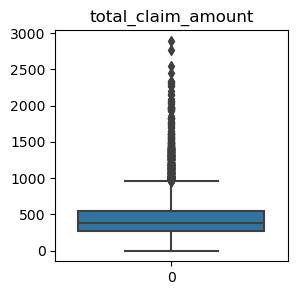

In [39]:
continuous_col = continuous_df.columns

for col in continuous_col:
    plt.figure(figsize=(3,3)) #figsize=(16,16)) was to big
    plt.title(col)
    sns.boxplot(data=continuous_df[col])

 customer_lifetime_value, monthly_premium_auto and total_claim_amount looks higly skewed from the Boxplot

# Lab | Cleaning categorical data
## Cristian Valeria

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed in the y axis instead of the x one.

In [40]:
categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [41]:
categorical['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

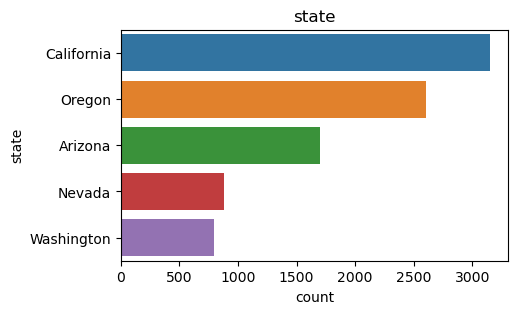

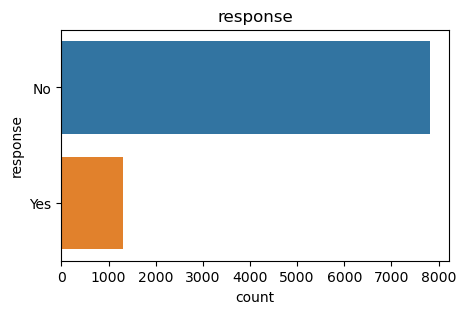

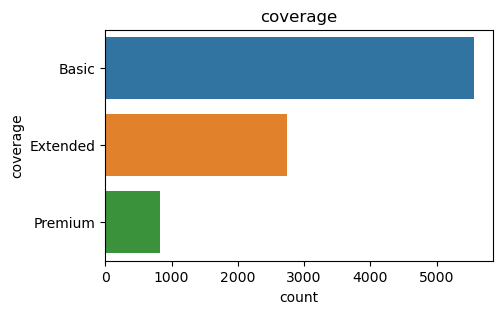

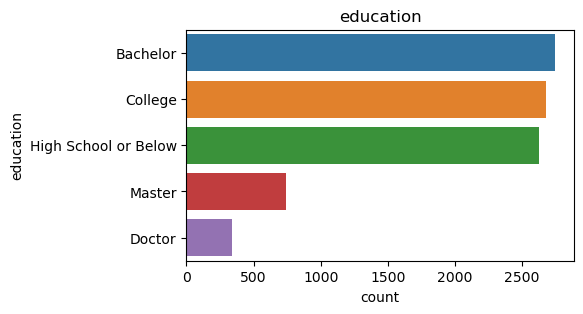

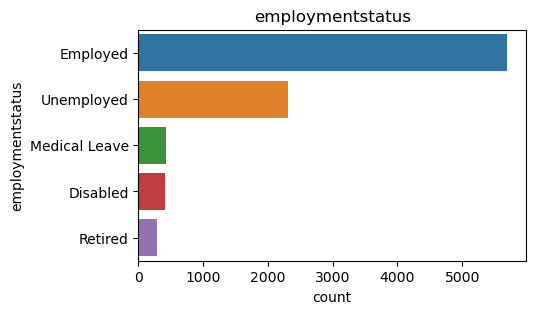

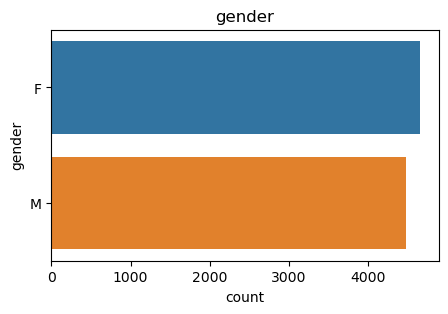

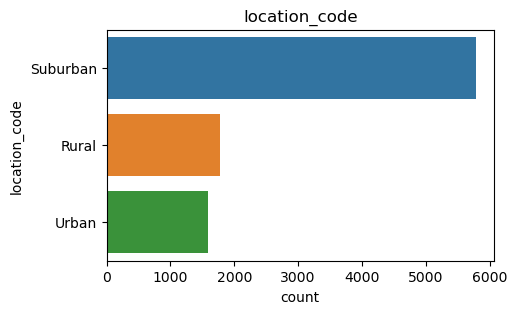

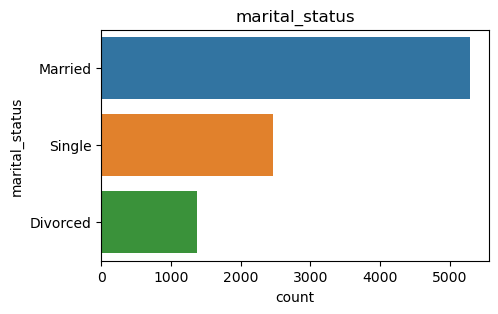

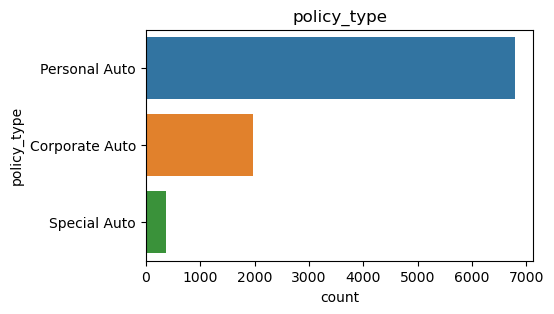

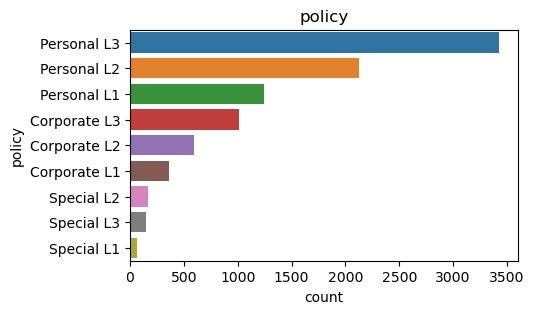

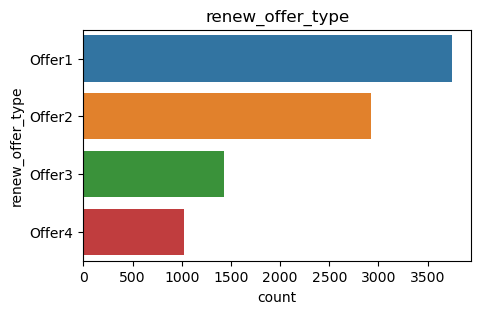

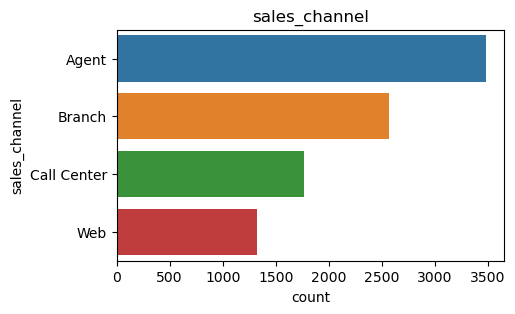

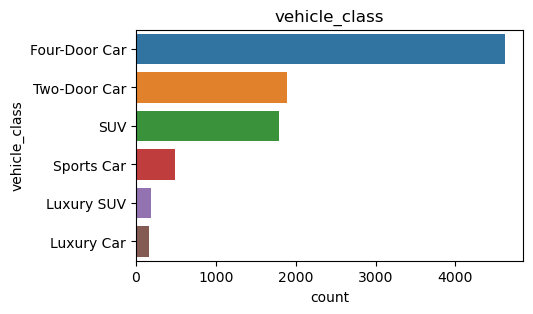

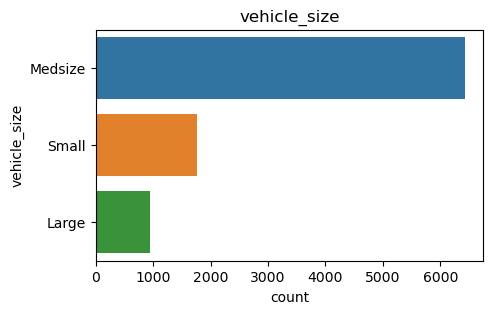

In [42]:
categorical_col = categorical.columns

for col in categorical_col:
    plt.figure(figsize=(5,3))
    plt.title(col)
    sns.countplot(y=categorical[col],
                 order = categorical[col].value_counts().index)

#sns.countplot(x=df["class"])

#### 2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with a OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [43]:
categorical = categorical.drop(columns='policy_type')

In [44]:
categorical.policy.unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [45]:
def cleanL(x):
    if x in ['Corporate L3','Personal L3','Special L3']:
        return 'L3'
    elif x in ['Corporate L2','Special L2','Personal L2']:
        return 'L2'
    else:
        return 'L1'
    
categorical['policy']=categorical['policy'].apply(cleanL)

In [46]:
categorical.policy.value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

#### 3. Time dependency analysis. Use a seaborn lineplot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

In [47]:
total_claim_time = customer_df[['effective_to_date','total_claim_amount']]

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

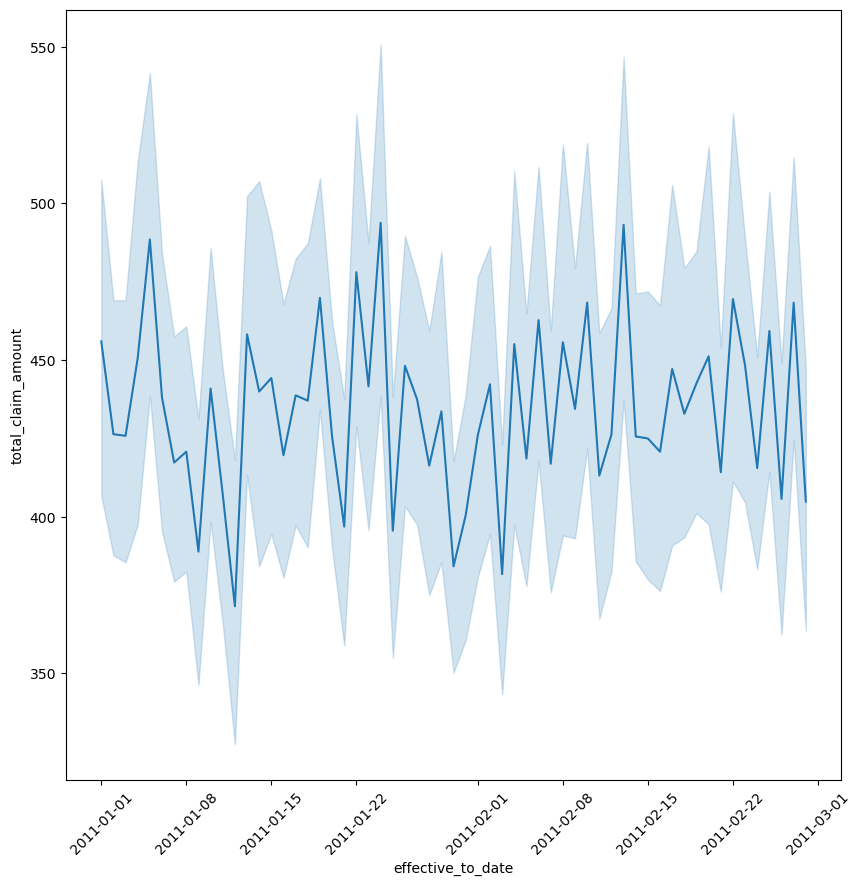

In [48]:
plt.figure(figsize =(10,10))
plt.xticks(rotation=45)
sns.lineplot(data=total_claim_time,x='effective_to_date',y='total_claim_amount')

#### 4.To continue the analysis define an empty pandas DataFrame, and add the following new columns:
- day with the day number of effective_to_date
- day_name with the day NAME of effective_to_date
- week with the week of effective_to_date
- month with the month NAME of effective_to_date
- total_claim_amount with total_claim_amount


In [49]:
day = customer_df['effective_to_date'].dt.day
day_name =  customer_df['effective_to_date'].dt.day_name()
week = customer_df['effective_to_date'].dt.isocalendar().week
month = customer_df['effective_to_date'].dt.month
total_claim_amount = customer_df['total_claim_amount']

In [50]:
total_claim_per_date = pd.concat([day,day_name,week,month,total_claim_amount],axis=1)

In [51]:
total_claim_per_date.columns = ['day','day_name','week','month','target']

In [52]:
total_claim_per_date.head()

day  day_name  week  month       target
0   24  Thursday     8      2   384.811147
1   31    Monday     5      1  1131.464935
2   19  Saturday     7      2   566.472247
3   20  Thursday     3      1   529.881344
4    3  Thursday     5      2   138.130879

#### 5. Compute the total 'target' column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [53]:
# What is target? i will assume ther ewas a typo in the last question

In [54]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [55]:
list_of_correct_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
total_claim_per_date.groupby('day_name').agg({'target':np.mean}).round(2).reindex(index=list_of_correct_days)

target
day_name         
Monday     428.56
Tuesday    432.46
Wednesday  443.54
Thursday   433.80
Friday     428.64
Saturday   435.26
Sunday     437.34

#### 6. Use a seaborn lineplot to plot the previous series. Do you see some differences by day of the week? 

In [56]:
target_day_name = total_claim_per_date.groupby('day_name').agg({'target':np.mean}).round(2).reindex(index=list_of_correct_days)

In [57]:
target_day_name.reset_index()

day_name  target
0     Monday  428.56
1    Tuesday  432.46
2  Wednesday  443.54
3   Thursday  433.80
4     Friday  428.64
5   Saturday  435.26
6     Sunday  437.34

In [58]:
target_day_name = target_day_name.reset_index()

<AxesSubplot:xlabel='day_name', ylabel='target'>

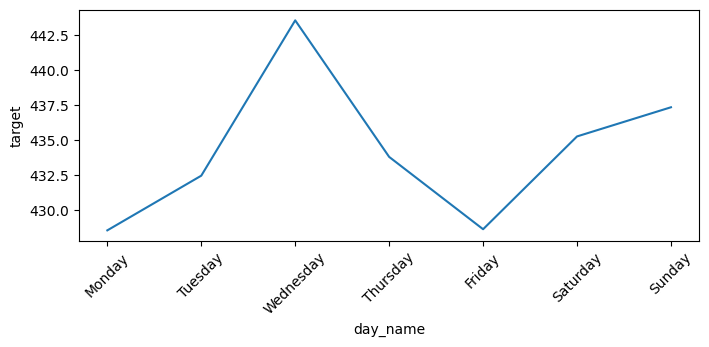

In [59]:
plt.figure(figsize =(8,3))
plt.xticks(rotation=45)
sns.lineplot(x=target_day_name['day_name'],y=target_day_name['target'])

Wednesday is the bigges 'target' day and friday goes down. 

#### 7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [60]:
# same as 5? 

#### 8.Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [61]:
target_day_name.columns = ['day_name','target_mean']

In [62]:
target_day_name.sort_values(by='target_mean')

day_name  target_mean
0     Monday       428.56
4     Friday       428.64
1    Tuesday       432.46
3   Thursday       433.80
5   Saturday       435.26
6     Sunday       437.34
2  Wednesday       443.54

#### 9. Plot the median "target" by day of the week name using a seaborn barplot

<AxesSubplot:xlabel='day_name', ylabel='target_mean'>

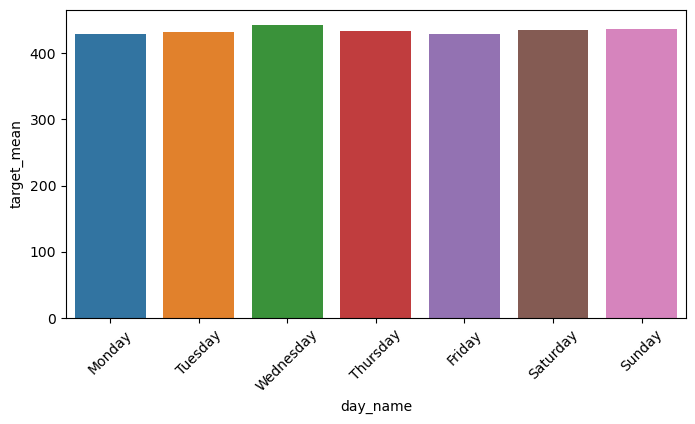

In [63]:
plt.figure(figsize =(8,4))
plt.xticks(rotation=45)
sns.barplot(data = target_day_name, x='day_name', y='target_mean')

#### 10. What do you can conclude from this analysis?

In [64]:
# total claims go up wednesday and go down friday but very little, not really considerably

#### 11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [65]:
list_of_correct_values = [1,2,3,4,5,6,7,8,9,10,11,12]
target_day_month = total_claim_per_date.groupby('month').agg({'target':np.mean}).round(2).reindex(index=list_of_correct_values).reset_index()

In [66]:
target_day_month.head()

month  target
0      1  432.25
1      2  436.22
2      3     NaN
3      4     NaN
4      5     NaN

#### 12. Can you do a monthly analysis given the output of the previous series? Why?

In [67]:
# no, because just have information of January, February
target_day_month.isnull()

month  target
0   False   False
1   False   False
2   False    True
3   False    True
4   False    True
5   False    True
6   False    True
7   False    True
8   False    True
9   False    True
10  False    True
11  False    True

#### 13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [68]:
mean_std = continuous_df.describe()[1:3]
mean_std 

customer_lifetime_value        income  monthly_premium_auto  \
mean              8004.940475  37657.380009             93.219291   
std               6870.967608  30379.904734             34.407967   

      months_since_policy_inception  total_claim_amount  
mean                      48.064594          434.088794  
std                       27.905991          290.500092

In [69]:
mean = continuous_df.mean()
std = continuous_df.std()

In [70]:
upper_cut = mean + 3 * std
lower_cut = mean - 3 * std

upper_cut.name = 'upper_cut'
lower_cut.name = 'lower_cut'

In [71]:
mean_std  = mean_std .append(upper_cut, ignore_index=False)
mean_std  = mean_std .append(lower_cut, ignore_index=False)
mean_std 

/var/folders/2b/6f80d7g11sl53b_wrqy2w81r0000gn/T/ipykernel_34829/2674302742.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_std  = mean_std .append(upper_cut, ignore_index=False)
/var/folders/2b/6f80d7g11sl53b_wrqy2w81r0000gn/T/ipykernel_34829/2674302742.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_std  = mean_std .append(lower_cut, ignore_index=False)


customer_lifetime_value         income  monthly_premium_auto  \
mean                   8004.940475   37657.380009             93.219291   
std                    6870.967608   30379.904734             34.407967   
upper_cut             28617.843300  128797.094210            196.443193   
lower_cut            -12607.962350  -53482.334193            -10.004612   

           months_since_policy_inception  total_claim_amount  
mean                           48.064594          434.088794  
std                            27.905991          290.500092  
upper_cut                     131.782566         1305.589070  
lower_cut                     -35.653379         -437.411481

In [72]:
display(mean_std.iloc[2,0])
display(mean_std.iloc[3,0])

28617.843300057844

-12607.962350083695

In [73]:
def cutt_3std(x):
    if x > mean_std.iloc[2,0]:
        return 'drop'
    if x< mean_std.iloc[3,0]:
        return 'drop'
    else:
        return x        

In [74]:
continuous_df['customer_lifetime_value'].apply(cutt_3std)

0       2763.519279
1       6979.535903
2       12887.43165
3       7645.861827
4       2813.692575
           ...     
9129    23405.98798
9130    3096.511217
9131    8163.890428
9132    7524.442436
9133    2611.836866
Name: customer_lifetime_value, Length: 9134, dtype: object

In [75]:
# then apply to all columns and then replace, and then drop the 'drop' values

#### 14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [76]:
continuous_clean_df = continuous_df.copy()
continuous_clean_df.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_policy_inception  total_claim_amount  
0                              5          384.811147  
1                             42         1131.464935  
2                             38          566.472247  
3                             65          529.881344  
4                             44          138.130879

In [77]:
continuous_df.shape

(9134, 5)

In [78]:
continuous_clean_df = continuous_clean_df[(continuous_clean_df['customer_lifetime_value']<mean_std.iloc[2,0])
                                         &(continuous_clean_df['customer_lifetime_value']>mean_std.iloc[3,0])]

In [79]:
continuous_clean_df = continuous_clean_df[(continuous_clean_df['income']<mean_std.iloc[2,1])
                                         &(continuous_clean_df['income']>mean_std.iloc[3,1])]
continuous_clean_df = continuous_clean_df[(continuous_clean_df['monthly_premium_auto']<mean_std.iloc[2,2])
                                         &(continuous_clean_df['monthly_premium_auto']>mean_std.iloc[3,2])]
continuous_clean_df = continuous_clean_df[(continuous_clean_df['months_since_policy_inception']<mean_std.iloc[2,3])
                                         &(continuous_clean_df['months_since_policy_inception']>mean_std.iloc[3,3])]
continuous_clean_df = continuous_clean_df[(continuous_clean_df['total_claim_amount']<mean_std.iloc[2,4])
                                         &(continuous_clean_df['total_claim_amount']>mean_std.iloc[3,4])]

In [80]:
continuous_clean_df.shape

(8670, 5)

In [81]:
display(continuous_clean_df.describe().loc[['min','max'],:])
display(mean_std.iloc[2:,:])

customer_lifetime_value   income  monthly_premium_auto  \
min              1898.007675      0.0                  61.0   
max             28511.033310  99981.0                 196.0   

     months_since_policy_inception  total_claim_amount  
min                            0.0            0.099007  
max                           99.0         1305.275432

customer_lifetime_value         income  monthly_premium_auto  \
upper_cut              28617.84330  128797.094210            196.443193   
lower_cut             -12607.96235  -53482.334193            -10.004612   

           months_since_policy_inception  total_claim_amount  
upper_cut                     131.782566         1305.589070  
lower_cut                     -35.653379         -437.411481

In [82]:
# max and min are not bigger or lower than the upper and lower cut, si is ok

#### 15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df and the relevant column of time_df. As after removing outliers the continuous_cleaned dataframe will have less rows (when you concat the individual dataframes using using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [83]:
#pd.concat([df1, df4], axis=1)

display(continuous_clean_df.head(2),continuous_clean_df.shape)
display(discrete_df.head(2),discrete_df.shape)
display(categorical.head(2),categorical.shape)

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   

   months_since_policy_inception  total_claim_amount  
0                              5          384.811147  
1                             42         1131.464935

(8670, 5)

months_since_last_claim  number_of_open_complaints  number_of_policies
0                       32                          0                   1
1                       13                          0                   8

(9134, 3)

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   

  location_code marital_status policy renew_offer_type sales_channel  \
0      Suburban        Married     L3           Offer1         Agent   
1      Suburban         Single     L3           Offer3         Agent   

   vehicle_class vehicle_size  
0   Two-Door Car      Medsize  
1  Four-Door Car      Medsize

(9134, 13)

In [84]:
time_df = total_claim_per_date[['day','day_name','week','month']]

In [85]:
display(time_df.head(2),time_df.shape)

day  day_name  week  month
0   24  Thursday     8      2
1   31    Monday     5      1

(9134, 4)

In [86]:
pd.concat([continuous_clean_df, discrete_df,categorical, time_df], axis=1).dropna().reset_index() #not save jet

index  customer_lifetime_value   income  monthly_premium_auto  \
0         0              2763.519279  56274.0                  69.0   
1         1              6979.535903      0.0                  94.0   
2         2             12887.431650  48767.0                 108.0   
3         3              7645.861827      0.0                 106.0   
4         4              2813.692575  43836.0                  73.0   
...     ...                      ...      ...                   ...   
8665   9129             23405.987980  71941.0                  73.0   
8666   9130              3096.511217  21604.0                  79.0   
8667   9131              8163.890428      0.0                  85.0   
8668   9132              7524.442436  21941.0                  96.0   
8669   9133              2611.836866      0.0                  77.0   

      months_since_policy_inception  total_claim_amount  \
0                               5.0          384.811147   
1                              42.0         1131.464935   
2                              38.0          566.472247   
3                              65.0          529.881344   
4                              44.0          138.130879   
...                             ...                 ...   
8665                           89.0          198.234764   
8666                           28.0          379.200000   
8667                           37.0          790.784983   
8668                            3.0          691.200000   
8669                           90.0          369.600000   

      months_since_last_claim  number_of_open_complaints  number_of_policies  \
0                          32                          0                   1   
1                          13                          0                   8   
2                          18                          0                   2   
3                          18                          0                   7   
4                          12                          0                   1   
...                       ...                        ...                 ...   
8665                       18                          0                   2   
8666                       14                          0                   1   
8667                        9                          3                   2   
8668                       34                          0                   3   
8669                        3                          0                   1   

           state  ... marital_status policy renew_offer_type sales_channel  \
0     Washington  ...        Married     L3           Offer1         Agent   
1        Arizona  ...         Single     L3           Offer3         Agent   
2         Nevada  ...        Married     L3           Offer1         Agent   
3     California  ...        Married     L2           Offer1   Call Center   
4     Washington  ...         Single     L1           Offer1         Agent   
...          ...  ...            ...    ...              ...           ...   
8665  California  ...        Married     L1           Offer2           Web   
8666  California  ...       Divorced     L3           Offer1        Branch   
8667  California  ...         Single     L2           Offer1        Branch   
8668  California  ...        Married     L2           Offer3        Branch   
8669  California  ...         Single     L3           Offer4   Call Center   

      vehicle_class vehicle_size day  day_name week month  
0      Two-Door Car      Medsize  24  Thursday    8     2  
1     Four-Door Car      Medsize  31    Monday    5     1  
2      Two-Door Car      Medsize  19  Saturday    7     2  
3               SUV      Medsize  20  Thursday    3     1  
4     Four-Door Car      Medsize   3  Thursday    5     2  
...             ...          ...  ..       ...  ...   ...  
8665  Four-Door Car      Medsize  10  Thursday    6     2  
8666  Four-Door Car      Medsize  12  Saturday    6     2  
8667  

#### 16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [87]:
customer_df_clean =  pd.concat([continuous_clean_df, discrete_df,categorical, time_df], axis=1).dropna().reset_index() #not save jet

In [88]:
customer_df_clean.head() 

index  customer_lifetime_value   income  monthly_premium_auto  \
0      0              2763.519279  56274.0                  69.0   
1      1              6979.535903      0.0                  94.0   
2      2             12887.431650  48767.0                 108.0   
3      3              7645.861827      0.0                 106.0   
4      4              2813.692575  43836.0                  73.0   

   months_since_policy_inception  total_claim_amount  months_since_last_claim  \
0                            5.0          384.811147                       32   
1                           42.0         1131.464935                       13   
2                           38.0          566.472247                       18   
3                           65.0          529.881344                       18   
4                           44.0          138.130879                       12   

   number_of_open_complaints  number_of_policies       state  ...  \
0                          0                   1  Washington  ...   
1                          0                   8     Arizona  ...   
2                          0                   2      Nevada  ...   
3                          0                   7  California  ...   
4                          0                   1  Washington  ...   

  marital_status policy renew_offer_type sales_channel  vehicle_class  \
0        Married     L3           Offer1         Agent   Two-Door Car   
1         Single     L3           Offer3         Agent  Four-Door Car   
2        Married     L3           Offer1         Agent   Two-Door Car   
3        Married     L2           Offer1   Call Center            SUV   
4         Single     L1           Offer1         Agent  Four-Door Car   

  vehicle_size day  day_name week month  
0      Medsize  24  Thursday    8     2  
1      Medsize  31    Monday    5     1  
2      Medsize  19  Saturday    7     2  
3      Medsize  20  Thursday    3     1  
4      Medsize   3  Thursday    5     2  

[5 rows x 26 columns]

In [89]:
customer_df_clean.columns

Index(['index', 'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'day', 'day_name', 'week', 'month'],
      dtype='object')

In [90]:
customer_df_clean = customer_df_clean[['index','customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'day', 'day_name', 'week', 'month', 'total_claim_amount']]

In [91]:
customer_df_clean.head()

index  customer_lifetime_value   income  monthly_premium_auto  \
0      0              2763.519279  56274.0                  69.0   
1      1              6979.535903      0.0                  94.0   
2      2             12887.431650  48767.0                 108.0   
3      3              7645.861827      0.0                 106.0   
4      4              2813.692575  43836.0                  73.0   

   months_since_policy_inception  months_since_last_claim  \
0                            5.0                       32   
1                           42.0                       13   
2                           38.0                       18   
3                           65.0                       18   
4                           44.0                       12   

   number_of_open_complaints  number_of_policies       state response  ...  \
0                          0                   1  Washington       No  ...   
1                          0                   8     Arizona       No  ...   
2                          0                   2      Nevada       No  ...   
3                          0                   7  California       No  ...   
4                          0                   1  Washington       No  ...   

  policy renew_offer_type sales_channel  vehicle_class vehicle_size day  \
0     L3           Offer1         Agent   Two-Door Car      Medsize  24   
1     L3           Offer3         Agent  Four-Door Car      Medsize  31   
2     L3           Offer1         Agent   Two-Door Car      Medsize  19   
3     L2           Offer1   Call Center            SUV      Medsize  20   
4     L1           Offer1         Agent  Four-Door Car      Medsize   3   

   day_name week month total_claim_amount  
0  Thursday    8     2         384.811147  
1    Monday    5     1        1131.464935  
2  Saturday    7     2         566.472247  
3  Thursday    3     1         529.881344  
4  Thursday    5     2         138.130879  

[5 rows x 26 columns]

#### 17.Turn the response column values into (Yes=1/No=0).

In [92]:
customer_df_clean['response'].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
def bin_yes_no(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [94]:
customer_df_clean['response'] = customer_df_clean['response'].apply(bin_yes_no)

In [95]:
customer_df_clean['response'].unique()

array([0, 1])

#### 18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [96]:
customer_df_clean['education'].value_counts()

Bachelor                2618
College                 2557
High School or Below    2466
Master                   700
Doctor                   329
Name: education, dtype: int64

In [97]:
def graduate(x):
    if x == 'Master' or x == 'Doctor':
        return 'Graduate'
    else:
        return x

In [98]:
customer_df_clean['education'] = customer_df_clean['education'].apply(graduate)
customer_df_clean['education'].value_counts()

Bachelor                2618
College                 2557
High School or Below    2466
Graduate                1029
Name: education, dtype: int64

#### 19. Reduce the class imbalance of employmentstatus grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [99]:
customer_df_clean['employmentstatus'].value_counts()

Employed         5418
Unemployed       2169
Medical Leave     418
Disabled          391
Retired           274
Name: employmentstatus, dtype: int64

In [100]:
def emplyment_status(x):
    if x == 'Medical Leave' or x == 'Disabled' or x == 'Retired':
        return 'Inactive'
    else:
        return x

In [101]:
customer_df_clean['employmentstatus'] = customer_df_clean['employmentstatus'].apply(emplyment_status)
customer_df_clean['employmentstatus'].value_counts()

Employed      5418
Unemployed    2169
Inactive      1083
Name: employmentstatus, dtype: int64

#### 20. Deal with column Gender turning the values into (1/0).

In [102]:
customer_df_clean['gender'].value_counts()

F    4426
M    4244
Name: gender, dtype: int64

In [103]:
def gender(x):
    if x == 'F':
        return 1
    else:
        return 0

customer_df_clean['gender'] = customer_df_clean['gender'].apply(gender)
customer_df_clean['gender'].value_counts()    

1    4426
0    4244
Name: gender, dtype: int64

#### 21.Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", "Luxury Car" into a commoun group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

In [104]:
customer_df_clean['vehicle_class'].value_counts()

Four-Door Car    4588
Two-Door Car     1871
SUV              1672
Sports Car        441
Luxury Car         50
Luxury SUV         48
Name: vehicle_class, dtype: int64

In [105]:
def emplyment_status(x):
    if x == 'Sports Car' or x == 'Luxury Car' or x == 'Luxury SUV':
        return 'Luxury'
    else:
        return x

customer_df_clean['vehicle_class'] = customer_df_clean['vehicle_class'].apply(emplyment_status)
customer_df_clean['vehicle_class'].value_counts()   

Four-Door Car    4588
Two-Door Car     1871
SUV              1672
Luxury            539
Name: vehicle_class, dtype: int64

#### 22. Now it's time to deal with the categorical ordinal columns, asigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [106]:
customer_df_clean.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8670 entries, 0 to 8669
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             8670 non-null   object
 1   coverage          8670 non-null   object
 2   education         8670 non-null   object
 3   employmentstatus  8670 non-null   object
 4   location_code     8670 non-null   object
 5   marital_status    8670 non-null   object
 6   policy            8670 non-null   object
 7   renew_offer_type  8670 non-null   object
 8   sales_channel     8670 non-null   object
 9   vehicle_class     8670 non-null   object
 10  vehicle_size      8670 non-null   object
 11  day_name          8670 non-null   object
dtypes: object(12)
memory usage: 812.9+ KB


In [107]:
customer_df_clean.coverage.value_counts()

Basic       5401
Extended    2553
Premium      716
Name: coverage, dtype: int64

In [108]:
def coverage(x):
    if x == 'Premium':
        return 1
    elif x == 'Extended':
        return 2
    else:
        return 3

customer_df_clean['coverage'] = customer_df_clean['coverage'].apply(coverage)
customer_df_clean['coverage'].value_counts()   

3    5401
2    2553
1     716
Name: coverage, dtype: int64

#### 23. Encode employmentstatus: "Employed" > "Inactive" > "Unemployed".

In [109]:
customer_df_clean['employmentstatus'].value_counts()

Employed      5418
Unemployed    2169
Inactive      1083
Name: employmentstatus, dtype: int64

In [110]:
def employmentstatus(x):
    if x == 'Employed':
        return 1
    elif x == 'Inactive':
        return 2
    else:
        return 3

customer_df_clean['employmentstatus'] = customer_df_clean['employmentstatus'].apply(employmentstatus)
customer_df_clean['employmentstatus'].value_counts()   

1    5418
3    2169
2    1083
Name: employmentstatus, dtype: int64

#### 24. Encode location code: "Urban" > "Suburban" > "Rural".

In [111]:
customer_df_clean['location_code'].value_counts()

Suburban    5421
Rural       1719
Urban       1530
Name: location_code, dtype: int64

In [112]:
def local(x):
    if x == 'Urban':
        return 1
    elif x == 'Suburban':
        return 2
    else:
        return 3

customer_df_clean['location_code'] = customer_df_clean['location_code'].apply(local)
customer_df_clean['location_code'].value_counts()   

2    5421
3    1719
1    1530
Name: location_code, dtype: int64

#### 25.Encode vehicle size: "Large" > "Medsize" > "Small".

In [113]:
customer_df_clean['vehicle_size'].value_counts()

Medsize    6095
Small      1664
Large       911
Name: vehicle_size, dtype: int64

In [114]:
def vehicle_size(x):
    if x == 'Large':
        return 1
    elif x == 'Medsize':
        return 2
    else:
        return 3

customer_df_clean['vehicle_size'] = customer_df_clean['vehicle_size'].apply(vehicle_size)
customer_df_clean['vehicle_size'].value_counts()   

2    6095
3    1664
1     911
Name: vehicle_size, dtype: int64

#### 26.Get a dataframe with the categorical nominal columns

In [115]:
categorical_nominal = customer_df_clean.select_dtypes(object)

In [116]:
categorical_nominal.head()

state education marital_status policy renew_offer_type sales_channel  \
0  Washington  Bachelor        Married     L3           Offer1         Agent   
1     Arizona  Bachelor         Single     L3           Offer3         Agent   
2      Nevada  Bachelor        Married     L3           Offer1         Agent   
3  California  Bachelor        Married     L2           Offer1   Call Center   
4  Washington  Bachelor         Single     L1           Offer1         Agent   

   vehicle_class  day_name  
0   Two-Door Car  Thursday  
1  Four-Door Car    Monday  
2   Two-Door Car  Saturday  
3            SUV  Thursday  
4  Four-Door Car  Thursday

#### 27.Create a list named levels which has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [117]:
list(categorical_nominal['state'].unique())

['Washington', 'Arizona', 'Nevada', 'California', 'Oregon']

In [118]:
levels = [list(categorical_nominal['state'].unique()),
         list(categorical_nominal['education'].unique()),
         list(categorical_nominal['marital_status'].unique()),
              list(categorical_nominal['policy'].unique()),
                   list(categorical_nominal['renew_offer_type'].unique()),
                        list(categorical_nominal['sales_channel'].unique()),
                             list(categorical_nominal['vehicle_class'].unique()),
                                  list(categorical_nominal['day_name'].unique())]

In [119]:
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['Thursday',
  'Monday',
  'Saturday',
  'Tuesday',
  'Wednesday',
  'Sunday',
  'Friday']]

#### 28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [120]:
from sklearn.preprocessing import OneHotEncoder

In [121]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categorical_nominal)

OneHotEncoder(drop='first')

In [122]:
categorical_nominal_encoded = encoder.transform(categorical_nominal).toarray()

In [123]:
categorical_nominal_encoded = pd.DataFrame(categorical_nominal_encoded, columns = encoder.get_feature_names_out())

In [124]:
display(categorical_nominal_encoded.head())

state_California  state_Nevada  state_Oregon  state_Washington  \
0               0.0           0.0           0.0               1.0   
1               0.0           0.0           0.0               0.0   
2               0.0           1.0           0.0               0.0   
3               1.0           0.0           0.0               0.0   
4               0.0           0.0           0.0               1.0   

   education_College  education_Graduate  education_High School or Below  \
0                0.0                 0.0                             0.0   
1                0.0                 0.0                             0.0   
2                0.0                 0.0                             0.0   
3                0.0                 0.0                             0.0   
4                0.0                 0.0                             0.0   

   marital_status_Married  marital_status_Single  policy_L2  ...  \
0                     1.0                    0.0        0.0  ...   
1                     0.0                    1.0        0.0  ...   
2                     1.0                    0.0        0.0  ...   
3                     1.0                    0.0        1.0  ...   
4                     0.0                    1.0        0.0  ...   

   sales_channel_Web  vehicle_class_Luxury  vehicle_class_SUV  \
0                0.0                   0.0                0.0   
1                0.0                   0.0                0.0   
2                0.0                   0.0                0.0   
3                0.0                   0.0                1.0   
4                0.0                   0.0                0.0   

   vehicle_class_Two-Door Car  day_name_Monday  day_name_Saturday  \
0                         1.0              0.0                0.0   
1                         0.0              1.0                0.0   
2                         1.0              0.0                1.0   
3                         0.0              0.0                0.0   
4                         0.0              0.0                0.0   

   day_name_Sunday  day_name_Thursday  day_name_Tuesday  day_name_Wednesday  
0              0.0                1.0               0.0                 0.0  
1              0.0                0.0               0.0                 0.0  
2              0.0                0.0               0.0                 0.0  
3              0.0                1.0               0.0                 0.0  
4              0.0                1.0               0.0                 0.0  

[5 rows x 26 columns]